## Визуализация торгов за день
- по реальным записям из базы
- тестовые торговые алгоритмы

In [106]:
%reload_ext autoreload
%autoreload 2

In [107]:
import os
from dotenv import load_dotenv

load_dotenv()

TOKEN = os.getenv("INVEST_TOKEN")

TICKER = 'RNFT'
FIGI = 'BBG00F9XX7H4'

10:00 - INIT 
     figi - BBG00F9XX7H4 (RNFT)
     commission - 0.05 %
     max_shares - 5
     base_shares - 5
     step_size - 1.4 RUR
     step_cnt - 2
     threshold_buy_steps - 6
     threshold_sell_steps - 0
     cur_used_cnt - 0
10:00 - BUY MARKET executed, price -135.4 n=1)
10:00 - BUY MARKET executed, price -135.4 n=2)
10:00 - Sell order set, price 138.6 n=2)
10:00 - Sell order set, price 137.2 n=2)
10:00 - Orders: buy [], sell [138.6, 137.2] 
10:00 - Buy order set, price -133.0 n=2)
10:00 - Buy order set, price -131.6 n=2)
10:01 - BUY order executed, price 133.0 (n=3)
10:01 - Sell order set, price 134.4 n=3)
10:01 - BUY order executed, price 131.6 (n=4)
10:01 - Sell order set, price 133.0 n=4)
10:01 - Orders: buy [], sell [138.6, 137.2, 134.4, 133.0] 
10:01 - Buy order set, price -131.6 n=4)
10:02 - SELL order executed, price 133.0 (n=3)
10:02 - Orders: buy [131.6], sell [138.6, 137.2, 134.4] 
10:02 - Buy order set, price -130.2 n=3)
10:03 - Orders: buy [131.6, 130.2], sell [

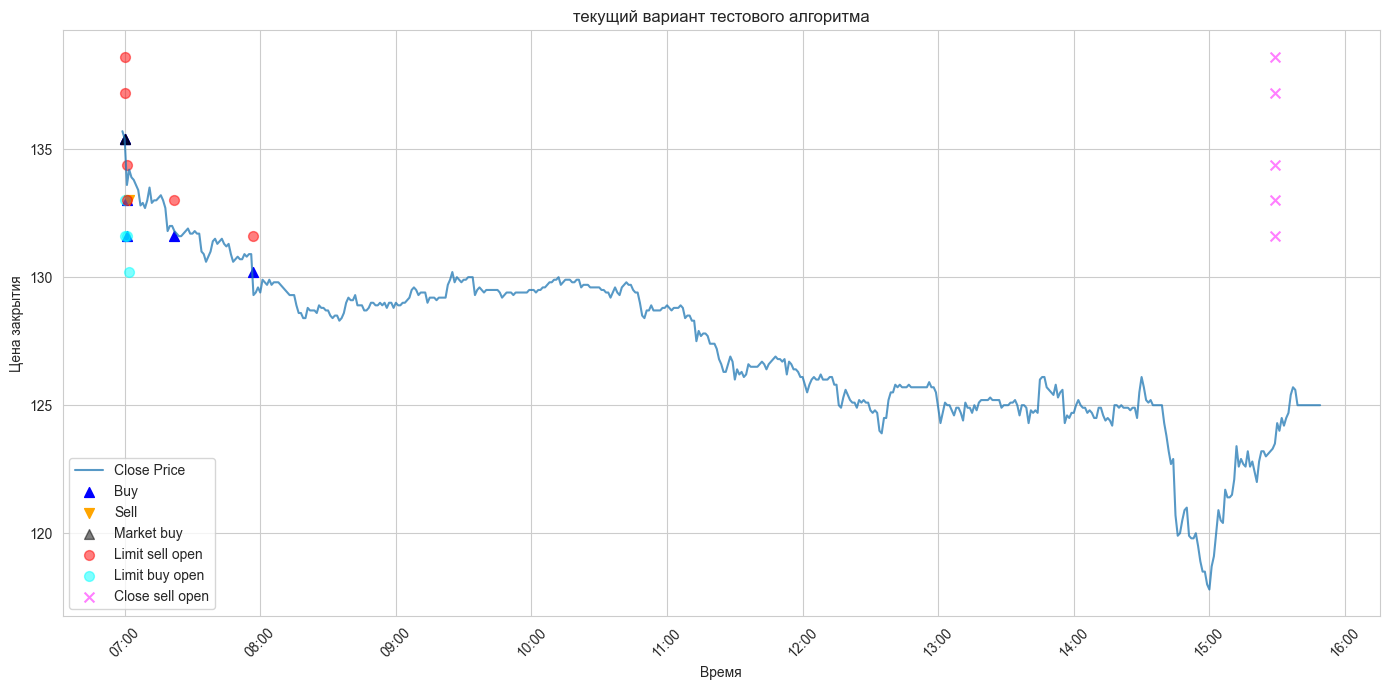

In [129]:
from datetime import datetime
from lib.visaualize import Visualize
from lib.historical_candles import HistoricalCandles
from lib.historical_trade import HistoricalTrade
from test_env.test_alg import TestAlgorithm

historical_trade = HistoricalTrade()
data_handler = HistoricalCandles(TOKEN, FIGI, TICKER)

date = '2024-03-15'

# проблемные зоны - тут идет лютый спад и всё сливается
# date = '2023-08-04'
# date = '2023-05-02'
# date = '2023-08-25'
# date = '2023-09-07'
# date = '2023-09-11'
# date = '2023-09-19'

# тут резкий скачок и перестает идти торговля
# date = '2023-09-12'

# date = None

alg_name = '-' #'v5_t60'
# alg_name = None #'v5_t60'

viz = Visualize(data_handler)

def show_test_alg(date_):
    if date_ is None:
        date_ = datetime.now().strftime('%Y-%m-%d')
    
    test_alg = TestAlgorithm(TOKEN, TICKER, FIGI, do_printing=False)
    
    result = test_alg.test(
        last_test_date = date_,
        test_days_num = 1, # тут берем всегда только 1 день для этого файла
    
        start_time='07:00',  # 10:45
        end_time='15:29',  # 18:15
    
        shares_count=0,
        max_shares=5,
        base_shares=5,
        step_size=1.4,
        step_cnt=2,
        threshold_buy_steps=6,
        threshold_sell_steps=0,
        
        sleep_trading=1 * 60, 
    )
    
    print(f"День: {date_}, 'тестовый', Итог: {result['profit']}, Записей: {result['operations_cnt']}")
    print(result)
    
    viz.draw(
        date_, 
        test_alg.accounting_helper.get_deals(),
        test_alg.accounting_helper.get_orders(),
        'текущий вариант тестового алгоритма'
    )

results = historical_trade.get_daily_totals(date, alg_name)

for obj in results:
    print(f"День: {obj.date}, {obj.alg_name}, "
          f"{'Итог' if obj.is_closed else 'Подытог'}: {obj.total}, "
          f"Записей: {obj.cnt}")
    viz.draw(
        obj.date, 
        historical_trade.get_deals(obj.date, obj.alg_name), 
        [],
        obj.alg_name
    )

show_test_alg(date)